In [1]:
import sys

sys.path.append("../")

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from mlresearch.utils import set_matplotlib_style
from algorec.environments import BankLoanApplication
from algorec.populations import BasePopulation
from algorec.recourse import NFeatureRecourse

# Some variables to define the problem
RNG_SEED = 42
N_CONTINUOUS = 5
N_CAT = 0
N_AGENTS = 100

# Environment variables
THRESHOLD = 0.8
ADAPTATION = 0.3
GROWTH_RATE = 1.1

# NOTE: use the following parameters to audit a bug in favorable y's
# The bug is either in the visualizations, or the success_rate function
# THRESHOLD = 0.99
# ADAPTATION = 0.01
# GROWTH_RATE = 1.1

In [3]:
# Generate data and fit regression
continuous = [f"f_{i}" for i in range(N_CONTINUOUS)]
categorical = [f"cat_{i}" for i in range(N_CAT)]
rng = np.random.default_rng(RNG_SEED)
df = pd.DataFrame(
    rng.random((N_AGENTS, N_CONTINUOUS)),
    columns=[f"f_{i}" for i in range(N_CONTINUOUS)],
)
for i in range(N_CAT):
    df[f"cat_{i}"] = rng.integers(0, 2, 100)
y = rng.integers(0, 2, 100)
lr = LogisticRegression().fit(df, y)

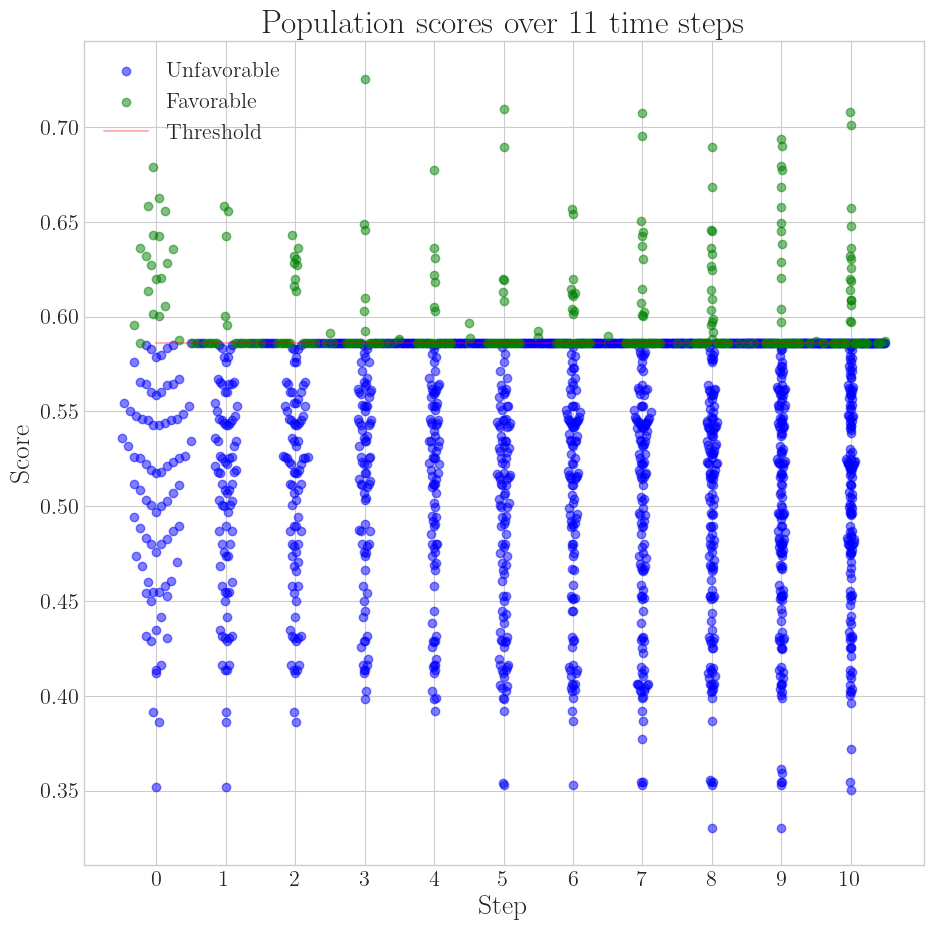

In [4]:
# Define the necessary components to run simulation
population = BasePopulation(df, categorical=categorical)
recourse = NFeatureRecourse(lr, n_features=2)
environment = BankLoanApplication(
    population,
    recourse,
    threshold=THRESHOLD,
    adaptation=ADAPTATION,
    growth_rate=GROWTH_RATE,
    random_state=RNG_SEED,
)

environment.run_simulation(10)

set_matplotlib_style(16)
environment.plot.agent_scores()
plt.show()

/home/joaofonseca/Research/recourse-game/recourse-game/notebooks/../algorec/visualization/plot_environment.py:140: FutureWarning: In a future version of pandas all arguments of DataFrame.any and Series.any will be keyword-only.
  move = (df.loc[idx] != df_prev.loc[idx]).any(1)
/home/joaofonseca/Research/recourse-game/recourse-game/notebooks/../algorec/visualization/plot_environment.py:140: FutureWarning: In a future version of pandas all arguments of DataFrame.any and Series.any will be keyword-only.
  move = (df.loc[idx] != df_prev.loc[idx]).any(1)


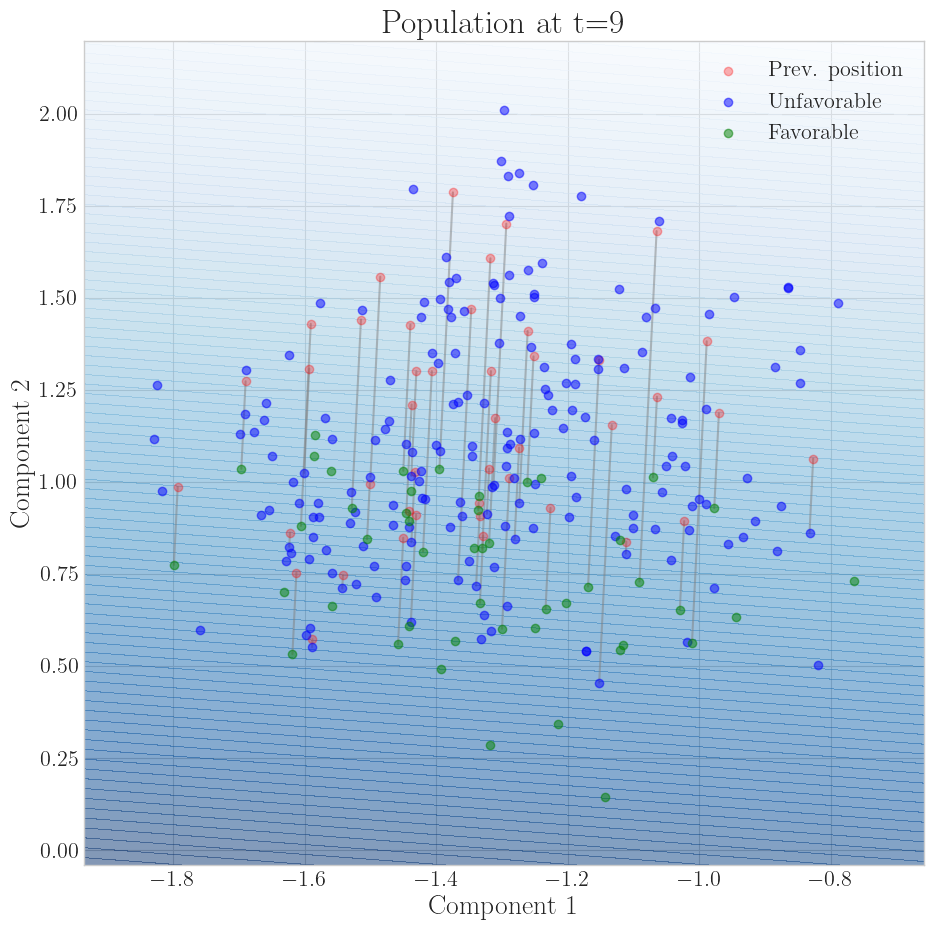

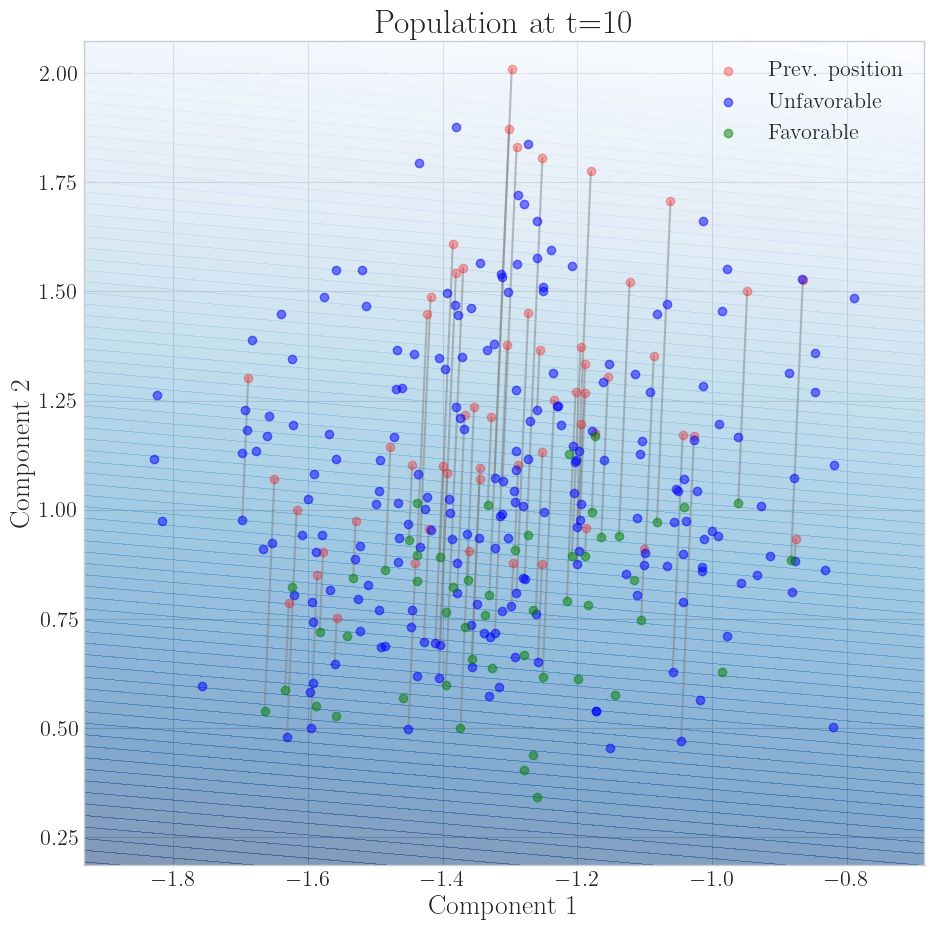

In [5]:
environment.plot.scatter(9)
environment.plot.scatter(10)
plt.show()

# Draft

In [6]:
environment.success_rate(0, 11)

3 27
9 31
9 45
9 46
10 39
11 55
12 51
9 52
8 57
12 82
18 74


array([0.11111111, 0.29032258, 0.2       , 0.19565217, 0.25641026,
       0.2       , 0.23529412, 0.17307692, 0.14035088, 0.14634146,
       0.24324324])